In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [20]:
df=pd.read_csv('/Users/mateusz/Desktop/melb_data.csv')

### Data Wrangling


In [21]:
#output a dataset
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [22]:
print(f'The rows are -- {df.shape[0]}')
print(f'The columns are -- {df.shape[1]}')
print(f'Size of data -- {df.size}')

The rows are -- 13580
The columns are -- 21
Size of data -- 285180


In [23]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [25]:
df.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car               True
Landsize         False
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [26]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [27]:
df.duplicated().any()

False

### Data Cleaning

In [28]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [29]:
df.rename(columns={'Type':'Type_of_housing',
                   'Method':'Property_Status',
                   'SellerG':'Estate_Agent',},inplace=True)

In [37]:

df['Type_of_housing']=df['Type_of_housing'].replace('h','house')
df['Type_of_housing']=df['Type_of_housing'].replace('u','unit')
df['Type_of_housing']=df['Type_of_housing'].replace('t','townhouse')

In [42]:
df['Property_Status']=df['Property_Status'].replace('S','Sold')
df['Property_Status']=df['Property_Status'].replace('SP','Sold Prior')
df['Property_Status']=df['Property_Status'].replace('PI','Passed In')
df['Property_Status']=df['Property_Status'].replace('VB','Vendor Bid')
df['Property_Status']=df['Property_Status'].replace('SA','Sold after Auction')


In [112]:
df.head(10)

,Suburb,Address,Rooms,Type_of_housing,Price,Property_Status,Estate_Agent,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,house,1480000.0,Sold,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,house,1035000.0,Sold,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,house,1465000.0,Sold Prior,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,house,850000.0,Passed In,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,house,1600000.0,Vendor Bid,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,house,941000.0,Sold,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,house,1876000.0,Sold,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,house,1636000.0,Sold,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,unit,300000.0,Sold,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,house,1097000.0,Sold,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [117]:
#change a date format 
df['Date']=pd.to_datetime(df['Date'], format="%d/%m/%Y")

### Data analysis


##### Top 10 popular Suburb 


In [75]:
top_Subrub=df.groupby(by='Suburb')['Address'].count().sort_values(ascending=False).head(10)
top_Subrub

Suburb
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
Essendon          220
South Yarra       202
Glen Iris         195
Hawthorn          191
Coburg            190
Name: Address, dtype: int64

In [74]:
top_Subrub.keys()

Index(['Reservoir', 'Richmond', 'Bentleigh East', 'Preston', 'Brunswick',
       'Essendon', 'South Yarra', 'Glen Iris', 'Hawthorn', 'Coburg'],
      dtype='object', name='Suburb')

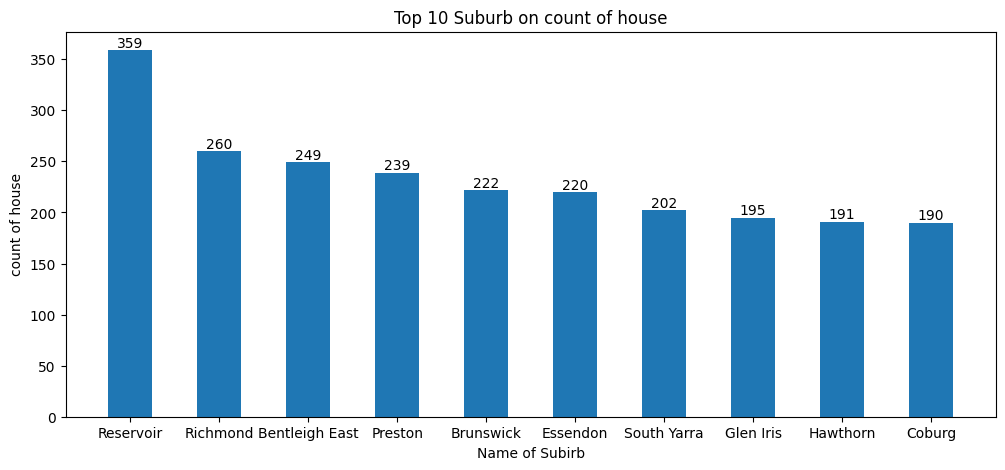

In [305]:
plt.figure(figsize=(12,5))
plt.bar(top_Subrub.keys(),top_Subrub.values,width=0.5)

#adding a data for columns
for i, (date, count) in enumerate(zip(top_Subrub.keys(),top_Subrub.values)):
    plt.text(date, count, f'{count}', ha='center', va='bottom')
plt.title('Top 10 Suburb on count of house')
plt.xlabel('Name of Subirb')
plt.ylabel('count of house')
plt.show()

#### Average Prcie in Month


In [121]:
df.head()

,Suburb,Address,Rooms,Type_of_housing,Price,Property_Status,Estate_Agent,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,house,1480000.0,Sold,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,house,1035000.0,Sold,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,house,1465000.0,Sold Prior,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,house,850000.0,Passed In,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,house,1600000.0,Vendor Bid,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [130]:
avg_price_in_2016=df.loc[df['Date'].dt.year == 2016].groupby(by=df['Date'].dt.month)['Price'].mean().reset_index()
avg_price_in_2017=df.loc[df['Date'].dt.year == 2017].groupby(by=df['Date'].dt.month)['Price'].mean().reset_index()

In [138]:
difference_in_sales=pd.merge(avg_price_in_2016,avg_price_in_2017,how='inner',on='Date')
difference_in_sales=difference_in_sales.rename(columns={'Date':'Month','Price_x':'Price_2016','Price_y':'Price_2017'})

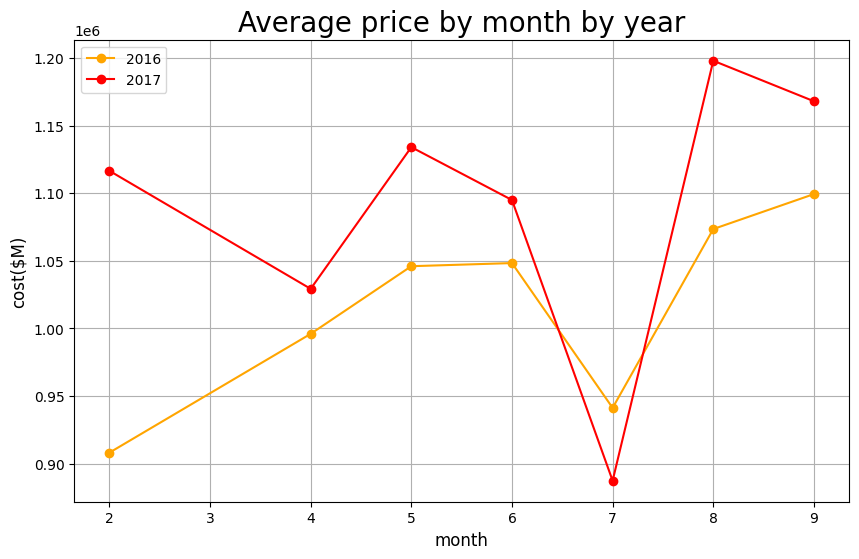

In [159]:
plt.figure(figsize=(10,6))
plt.plot(difference_in_sales['Month'],difference_in_sales['Price_2016'],color='orange',marker='o',label='2016')
plt.plot(difference_in_sales['Month'],difference_in_sales['Price_2017'],color='red',marker='o',label='2017')
plt.title('Average price by month by year',fontsize=20)
plt.xlabel('month',fontsize=12)
plt.ylabel('cost($M)',fontsize=12)
plt.grid()
plt.legend()
plt.show()

###  Top 5 sales quantity by agent

In [160]:
df.head()

,Suburb,Address,Rooms,Type_of_housing,Price,Property_Status,Estate_Agent,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,house,1480000.0,Sold,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,house,1035000.0,Sold,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,house,1465000.0,Sold Prior,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,house,850000.0,Passed In,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,house,1600000.0,Vendor Bid,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [168]:
top_agents=df.groupby(by='Estate_Agent')['Address'].count().reset_index().nlargest(5,'Address')

([<matplotlib.patches.Wedge at 0x1765188b0>,
 [Text(0.7887516302263036, 0.9043621320109267, 'Nelson'),
  Text(-0.8293928504536242, 0.7225700655413372, 'Jellis'),
  Text(-0.883885551890265, -0.6547872411399309, 'hockingstuart'),
  Text(0.2771601579347843, -1.0645103319618676, 'Barry'),
  Text(1.020575117041771, -0.4103978928737035, 'Ray')],
 [Text(0.525834420150869, 0.6029080880072843, '27.2%'),
  Text(-0.5277954502886698, 0.45981731443539636, '22.8%'),
  Text(-0.5624726239301685, -0.4166827898163197, '20.3%'),
  Text(0.17637464595849908, -0.6774156657939157, '17.6%'),
  Text(0.649456892662945, -0.261162295465084, '12.2%')])

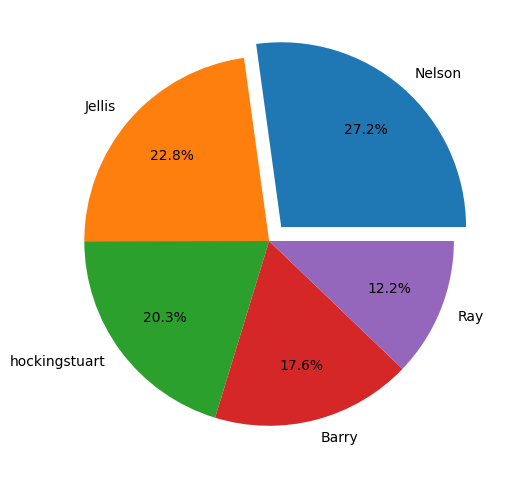

In [184]:


plt.figure(figsize=(10,6))
plt.pie(top_agents['Address'],labels=top_agents['Estate_Agent'],autopct='%1.1f%%',pctdistance=0.7,explode=[0.1,0,0,0,0])

#### THe most popular type of house in Southern Metropolitan and Northern Metropolitan 

In [185]:
df.head()

,Suburb,Address,Rooms,Type_of_housing,Price,Property_Status,Estate_Agent,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,house,1480000.0,Sold,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,house,1035000.0,Sold,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,house,1465000.0,Sold Prior,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,house,850000.0,Passed In,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,house,1600000.0,Vendor Bid,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [199]:
popular_type_of_housing=df.loc[df['Regionname'].isin(['Northern Metropolitan','Southern Metropolitan'])].groupby(by=['Regionname','Type_of_housing']).agg(Count=('Address','nunique')).reset_index()
popular_type_of_housing

,Regionname,Type_of_housing,Count
0,Northern Metropolitan,house,2720
1,Northern Metropolitan,townhouse,303
2,Northern Metropolitan,unit,816
3,Southern Metropolitan,house,2698
4,Southern Metropolitan,townhouse,423
5,Southern Metropolitan,unit,1542


<Figure size 1000x600 with 0 Axes>

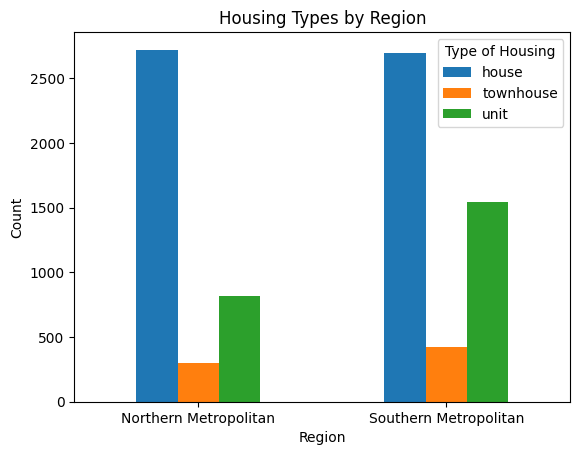

In [224]:
pivot_df = popular_type_of_housing.pivot(index='Regionname', columns='Type_of_housing', values='Count')

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Housing Types by Region')
plt.xticks(rotation=0)  
plt.legend(title='Type of Housing',loc='upper right')
plt.show()

#### Average Price and landsize of house 

In [225]:
df.head()

,Suburb,Address,Rooms,Type_of_housing,Price,Property_Status,Estate_Agent,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,house,1480000.0,Sold,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,house,1035000.0,Sold,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,house,1465000.0,Sold Prior,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,house,850000.0,Passed In,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,house,1600000.0,Vendor Bid,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [255]:
housing_in_center=df[['Price','Distance','Landsize']]

In [256]:
renew_price_and_landscape=housing_in_center.groupby(by='Distance').agg({'Price':'mean','Landsize':'mean'}).reset_index()
renew_price_and_landscape['Price']=renew_price_and_landscape['Price'].apply(lambda x: round(x,2))
renew_price_and_landscape['Landsize']=renew_price_and_landscape['Landsize'].apply(lambda x: round(x,2))

In [257]:
renew_price_and_landscape.head(5)

,Distance,Price,Landsize
0,0.0,671166.67,14.83
1,0.7,579250.00,2545.50
2,1.2,647287.88,559.33
3,1.3,1261000.00,538.20
4,1.5,1492941.18,119.59


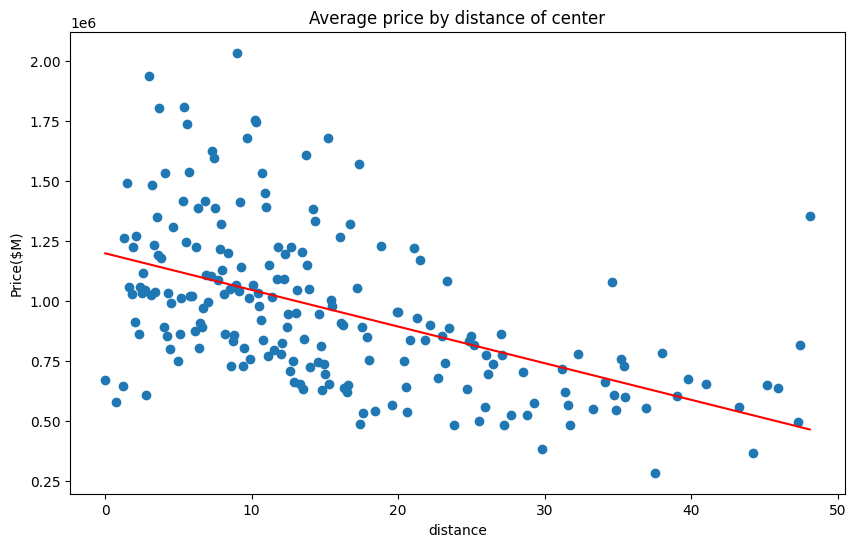

In [297]:
plt.figure(figsize=(10,6))
plt.scatter(renew_price_and_landscape['Distance'],renew_price_and_landscape['Price'])
plt.title('Average price by distance of center')
plt.xlabel('distance')
plt.ylabel('Price($M)')


coefficients = np.polyfit(renew_price_and_landscape['Distance'], renew_price_and_landscape['Price'], 1)  # Fit a first-degree polynomial (linear)
trendline = np.poly1d(coefficients)

# Plot trendline
plt.plot(renew_price_and_landscape['Distance'], trendline(renew_price_and_landscape['Distance']), color='red', label='Trendline')


Text(0.5, 0, 'Price($M)')

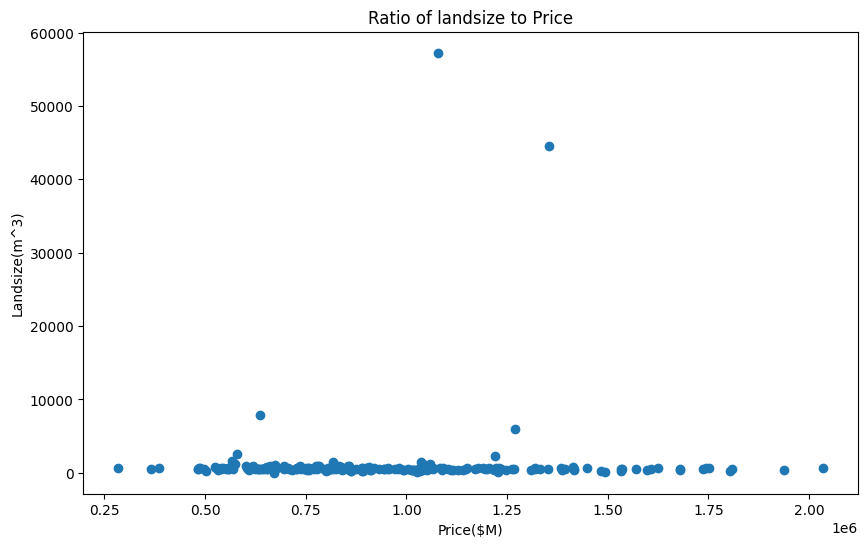

In [302]:
plt.figure(figsize=(10,6))
plt.scatter(renew_price_and_landscape['Price'],renew_price_and_landscape['Landsize'])
plt.title('Ratio of landsize to Price')
plt.ylabel('Landsize(m^3)')
plt.xlabel('Price($M)')

#### How many houses was sold in 2016

In [264]:
df.head()

,Suburb,Address,Rooms,Type_of_housing,Price,Property_Status,Estate_Agent,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,house,1480000.0,Sold,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,house,1035000.0,Sold,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,house,1465000.0,Sold Prior,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,house,850000.0,Passed In,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,house,1600000.0,Vendor Bid,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [292]:
sold_houses_2016=df.loc[(df['Property_Status'] == 'Sold') & (df['Date'].dt.year == 2016)]
sold_houses_by_month=sold_houses_2016.groupby(by=sold_houses_2016['Date'].dt.month)['Address'].count().reset_index()

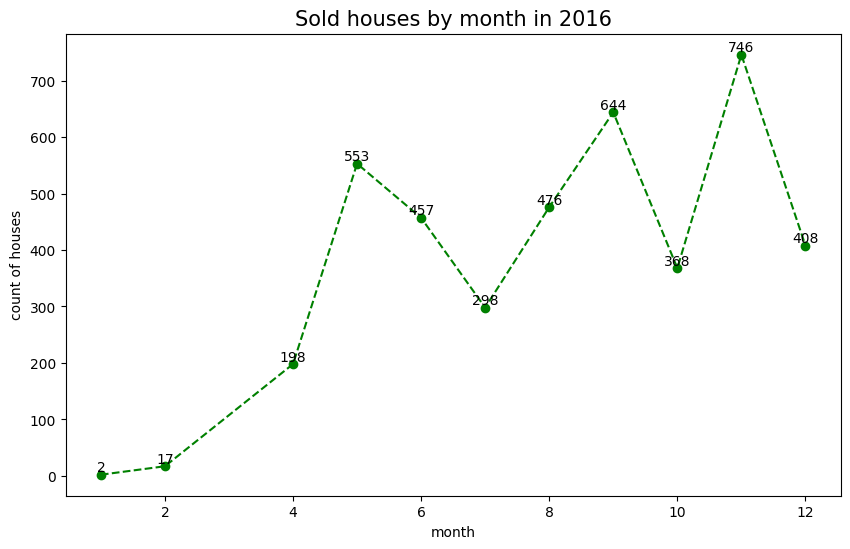

In [308]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(sold_houses_by_month['Date'], sold_houses_by_month['Address'], 'g--o')


for i, (date, count) in enumerate(zip(sold_houses_by_month['Date'], sold_houses_by_month['Address'])):
    plt.text(date, count, f'{count}', ha='center', va='bottom')

plt.title('Sold houses by month in 2016',fontsize=15)
plt.xlabel('month')
plt.ylabel('count of houses')

plt.show()
